In [1]:
%matplotlib inline

In [56]:
import seaborn as sns

In [113]:
from collections import defaultdict
from operator import itemgetter
import os
import random
import string
import sys
import time
import numpy as np
import pandas as pd


def generate_dataset_from_parameters(nb_samples,
                                     dimensionality,
                                     class_0_proportion,
                                     sigma_0,
                                     sigma_1,
                                     distances):
    # Allocate memory
    X = np.zeros((nb_samples,dimensionality))
    # Draw random number of instances in class 0 according to a binomial distribution
    nb_instances_class_0 = np.random.binomial(n=nb_samples, p=class_0_proportion)
    # Set labels
    Y = np.zeros(nb_samples)
    Y[nb_instances_class_0:] += 1
    # Add random noise to class 0 and class 1
    X[:nb_instances_class_0,:] = np.random.randn(nb_instances_class_0,dimensionality) * sigma_0
    X[nb_instances_class_0:,:] = np.random.randn(nb_samples - nb_instances_class_0,dimensionality) * sigma_1
    # Add random distances between class centers, class 0 is centered in 0 and the other class is chosen whith a given boundary
    X[nb_instances_class_0:,:] += distances
    return X,Y
    
def compute_separability(distances, sigmas_class_0, sigmas_class_1):
    return distances * 1./ (sigmas_class_0 + sigmas_class_1)
    
def generate_dataset(nb_samples,
                     dimensionality,
                     min_sigma,
                     max_sigma,
                     min_distance,
                     max_distance,
                     class_0_proportion):
    
    sigmas_class_0 = np.random.uniform(low=min_sigma, high=max_sigma, size=dimensionality)
    sigmas_class_1 = np.random.uniform(low=min_sigma, high=max_sigma, size=dimensionality)
    distances = np.random.uniform(low=min_distance, high=max_distance, size=dimensionality)
    parameters = {"dimensionality": dimensionality,
                  "class_0_proportion": class_0_proportion,
                  "sigma_0": sigmas_class_0,
                  "sigma_1": sigmas_class_1,
                  "distances": distances}
    X,Y = generate_dataset_from_parameters(nb_samples,**parameters)
    return X,Y,parameters

In [114]:
dimensionality = 10
nb_samples = 100
min_sigma = 0.1
max_sigma = 1
min_distance = 0.1
max_distance = 1
class_0_proportion = 0.5

In [115]:
X,Y,s = generate_dataset(nb_samples,
                         dimensionality,
                         min_sigma,
                         max_sigma,
                         min_distance,
                         max_distance,
                         class_0_proportion)

In [116]:
df = pd.DataFrame(X)
df["y"] = Y

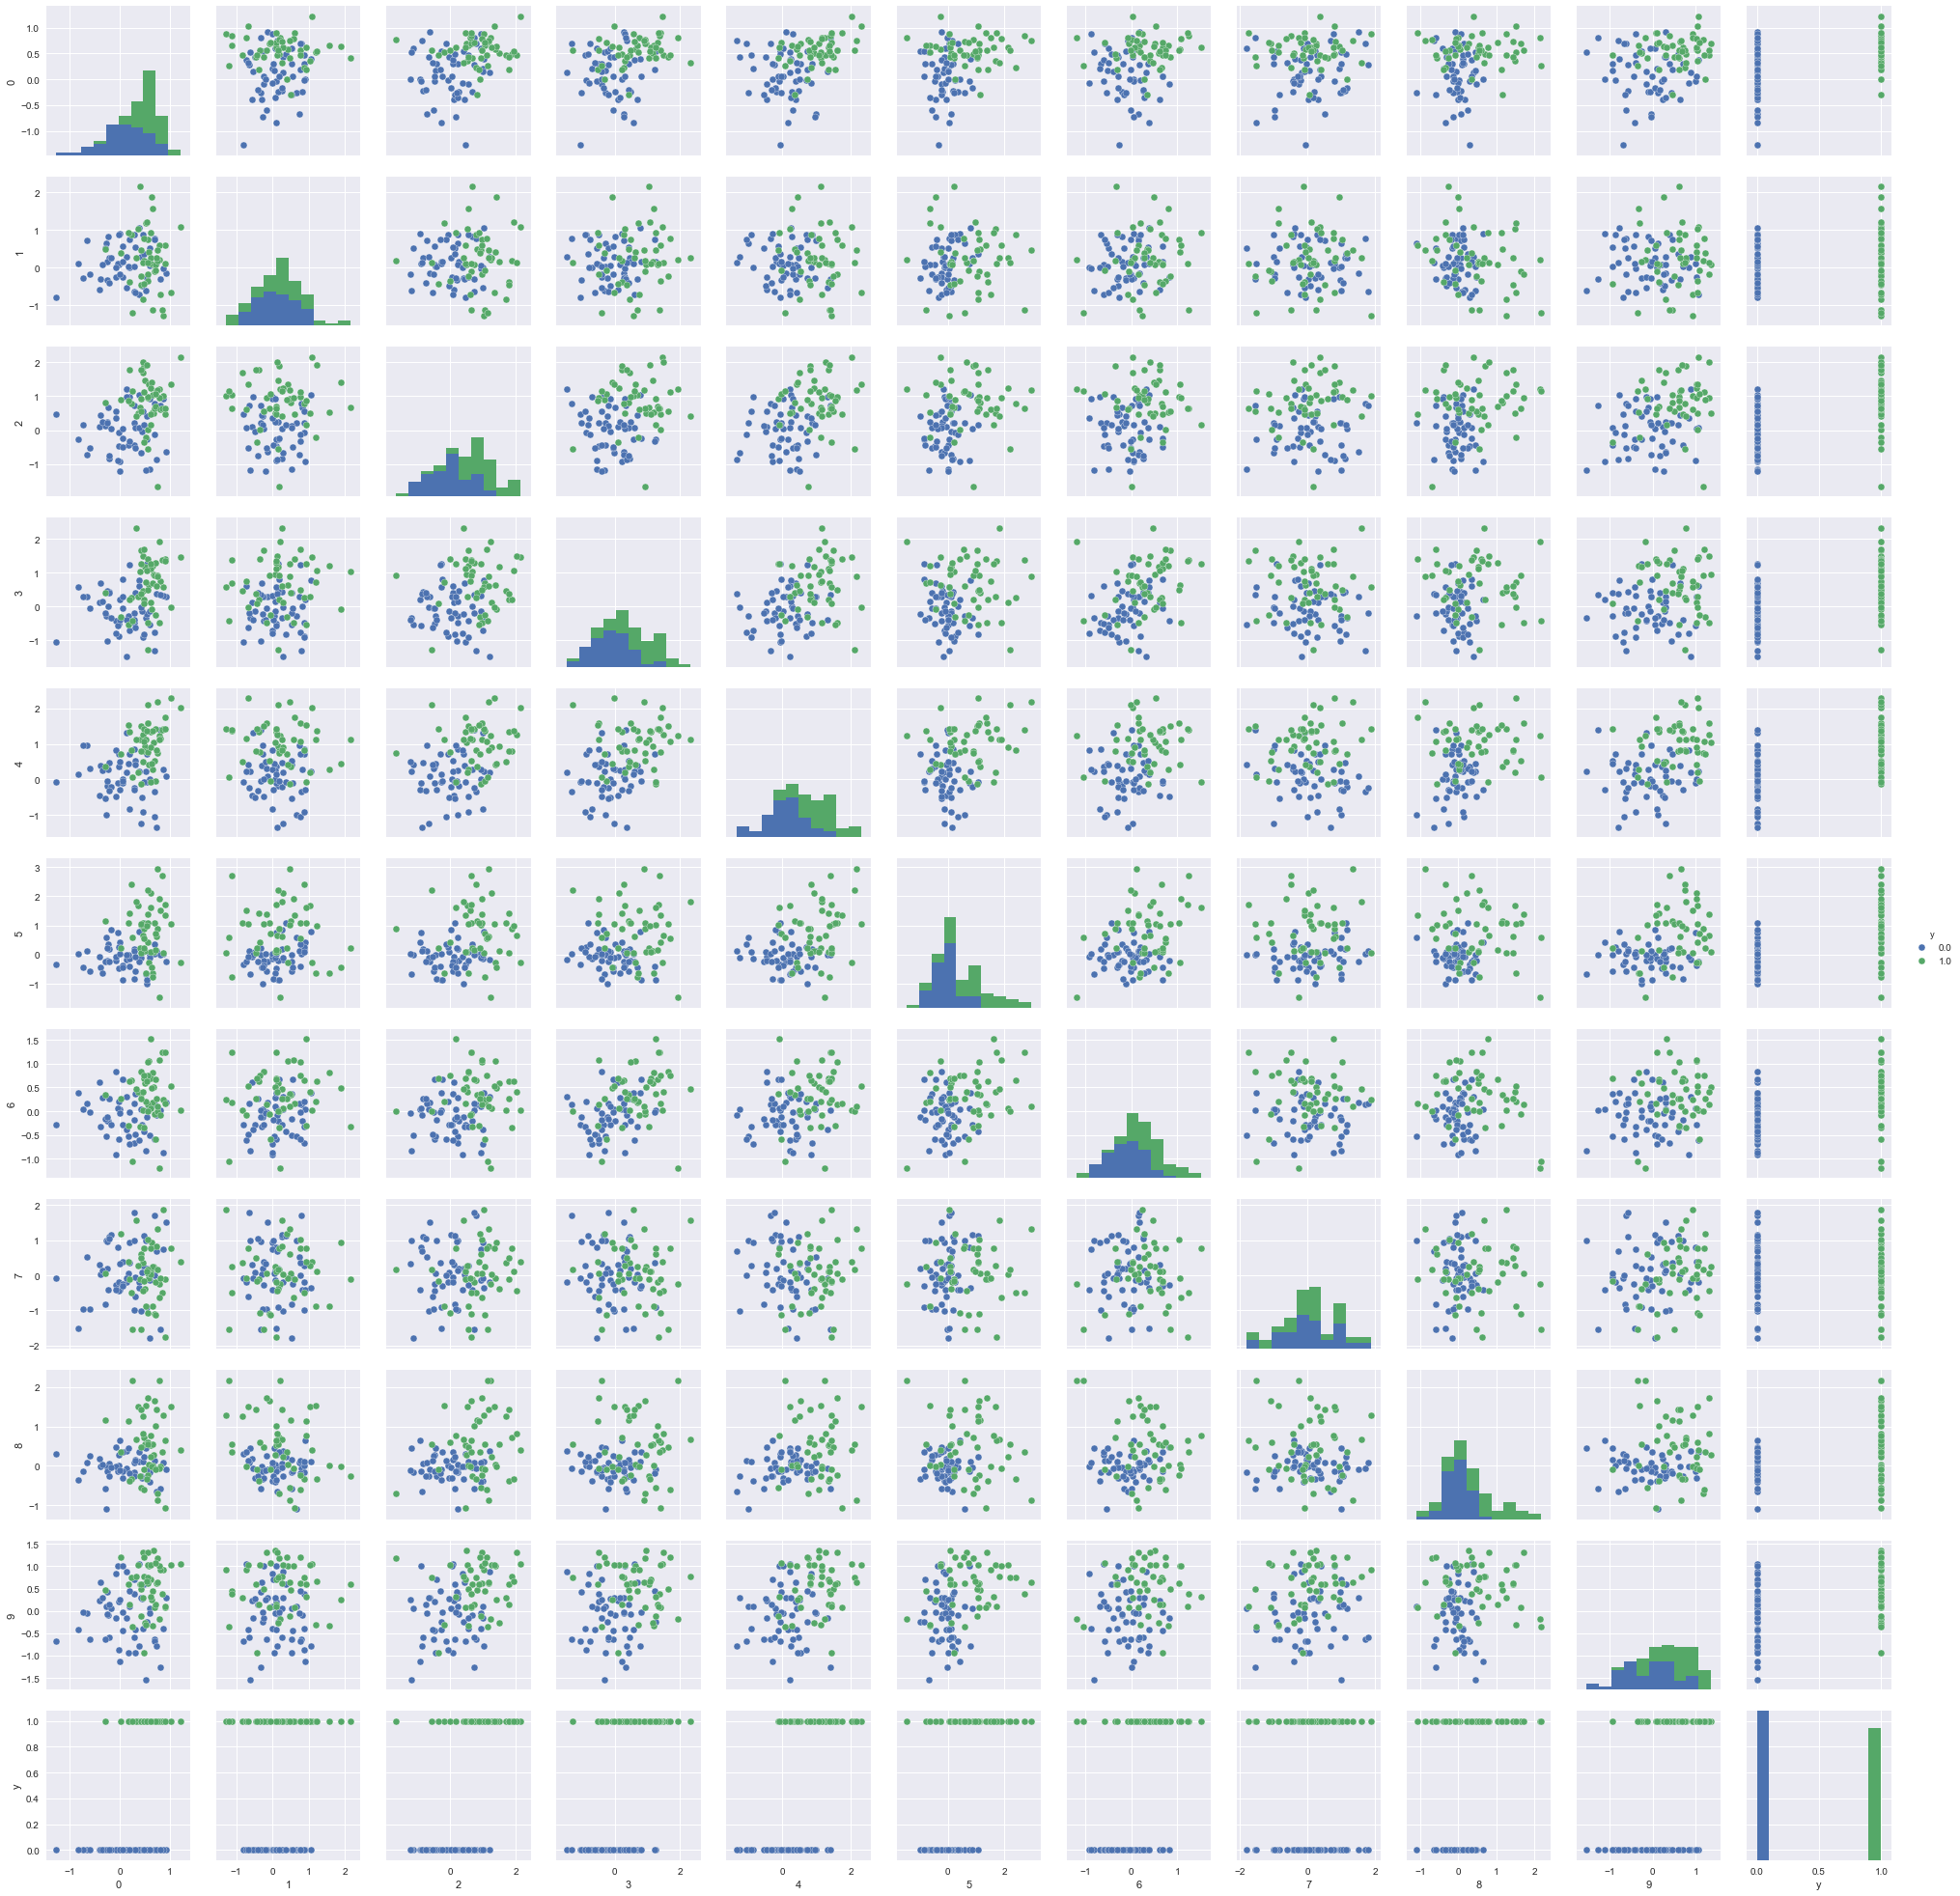

In [117]:
sns.pairplot(df,hue="y")

In [118]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()

In [119]:
dimensions = range(5) 
features = dimensions
clf = clf.fit(df[features], df["y"])

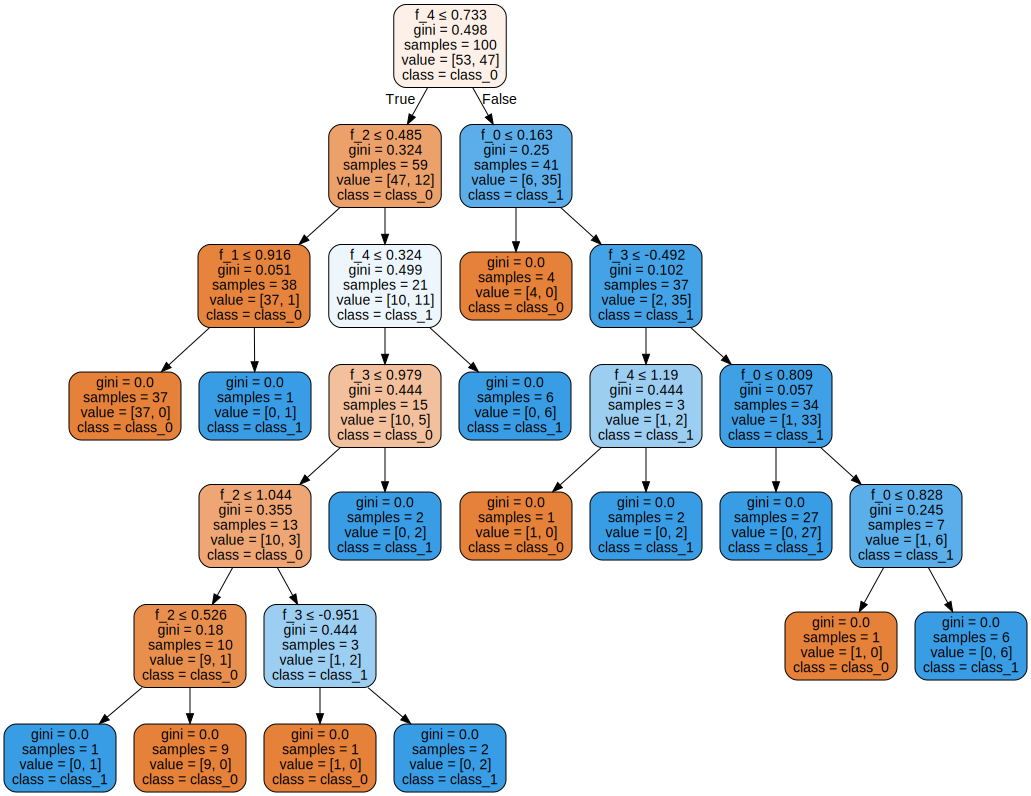

In [120]:
import graphviz 
dot_data = tree.export_graphviz(clf, out_file=None, 
                         feature_names=["f_"+`f` for f in features],  
                         class_names=["class_0", "class_1"],  
                         filled=True, rounded=True,  
                         special_characters=True)  

graph = graphviz.Source(dot_data)  
graph 

In [121]:
clf.feature_importances_

array([ 0.16863298,  0.03908809,  0.20026368,  0.07815916,  0.51385609])

In [123]:
s["sigma_0"][0] = np.nan
s["sigma_1"][0] = np.nan

# Ideas for experiments

## Experiment
+ Choose different data-creation meta-parameters and draw different modifications of the meta-parameters (both depending on what we want to test)
+ For each (parameter, modification) draw a sample
    + For each sample
        + Evolve one tree
        + Update the tree using each method (STRUT, SER, OURS) using a small sample, compute the quality of each tree
        + Evolve a tree from scratch in the small sample, compute the quality of the tree
        + Draw a very large sample and build a tree from scratch, compute the quality of the tree
